# Биоинформатика для высокопроизводительного секвенирования (рус) / Homework 1

Мы будем работать с данными РНК-seq, полученными из коры (B) и мозжечка
(C) мышей разного возраста (от 15.5 до 34 дней от зачатия). \
Для сокращения объема расчетов данные получены только для
19ой хромосомы.
________

In [59]:
# install conda (for google colab)
!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh
!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -q -b -f -p /usr/local
#!rm ./Anaconda3-5.1.0-Linux-x86_64.sh

--2022-11-06 21:29:27--  https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/archive/Anaconda3-5.1.0-Linux-x86_64.sh [following]
--2022-11-06 21:29:27--  https://repo.anaconda.com/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 577996269 (551M) [application/x-sh]
Saving to: ‘Anaconda3-5.1.0-Linux-x86_64.sh’

Anaconda3-5.1.0-Lin 100%[===================>] 551.22M  97.5MB/s    in 12s     

2022-11-06 21:29:39 (46.9 MB/s) - ‘Anaconda3-5.1.0-Linux-x86_64.sh’ s

In [2]:
!mkdir rnaseq_1

1) Найти в интернете и скачать fastqc. Проверить все входные данные при помощи fastqc.

In [3]:
!curl https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip -o rnaseq_1/fastqc.zip
!unzip -qq rnaseq_1/fastqc.zip -d rnaseq_1/
!chmod 777 rnaseq_1/FastQC/fastqc
#!rm rnaseq_1/fastqc.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9.7M  100  9.7M    0     0  6428k      0  0:00:01  0:00:01 --:--:-- 6428k


In [5]:
!cd rnaseq_1 && mkdir data
# данные скачаны по ссылке: shorturl.at/fgEJV на локалку,
# а затем перенесены вручную в эту папку (rnaseq_1/data/)

In [33]:
# запуск fastqc
!mkdir rnaseq_1/data/fastqc_outputs
!rnaseq_1/FastQC/fastqc rnaseq_1/data/*.fq.gz -o rnaseq_1/data/fastqc_outputs

Started analysis of B14.5.fq.gz
Approx 5% complete for B14.5.fq.gz
Approx 10% complete for B14.5.fq.gz
Approx 15% complete for B14.5.fq.gz
Approx 20% complete for B14.5.fq.gz
Approx 25% complete for B14.5.fq.gz
Approx 30% complete for B14.5.fq.gz
Approx 35% complete for B14.5.fq.gz
Approx 40% complete for B14.5.fq.gz
Approx 45% complete for B14.5.fq.gz
Approx 50% complete for B14.5.fq.gz
Approx 55% complete for B14.5.fq.gz
Approx 60% complete for B14.5.fq.gz
Approx 65% complete for B14.5.fq.gz
Approx 70% complete for B14.5.fq.gz
Approx 75% complete for B14.5.fq.gz
Approx 80% complete for B14.5.fq.gz
Approx 85% complete for B14.5.fq.gz
Approx 90% complete for B14.5.fq.gz
Approx 95% complete for B14.5.fq.gz
Analysis complete for B14.5.fq.gz
Started analysis of B15.5.fq.gz
Approx 5% complete for B15.5.fq.gz
Approx 10% complete for B15.5.fq.gz
Approx 15% complete for B15.5.fq.gz
Approx 20% complete for B15.5.fq.gz
Approx 25% complete for B15.5.fq.gz
Approx 30% complete for B15.5.fq.gz
Appr

Полученные данные (html репорты) были сравнены с эталонами (хороший и плохой fastqc репорт): \
- хороший fastqc report: https://www.bioinformatics.babraham.ac.uk/projects/fastqc/good_sequence_short_fastqc.html \
- плохой fastqc report: https://www.bioinformatics.babraham.ac.uk/projects/fastqc/bad_sequence_fastqc.html.
____________

В отличие от нормального репорта, все 10 репортов по заданию содержат failure status в секции _'per base sequence content'_. \
В соответствии с ответом на форуме (https://www.biostars.org/p/371979/) это может быть нормальным для RNA-seq data. \
Вообще, эта ошибка говорит о разнице между нуклеотидами более чем в 20% на каждой позиции (https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/4%20Per%20Base%20Sequence%20Content.html). \
Следующая ошибка (возникает в 3 файлах из 10 имеющихся) - _'sequence duplication levels'_. Как пишется здесь (https://www.biostars.org/p/307361/), высокий уровень дупликаций в случае RNA-seq - явление нормальное и ожидаемое (более того, советуют в дальнейшем анализе не удалять дубликаты, так как это могло бы привести к недооценке истинной экспрессии высокоэкспрессируемых генов, поскольку это действо может уменьшить количество таких генов). \
У одного файла есть еще ошибка в секции _'per tile sequence content'_. Причинами появления ошибки на этом графике могут быть проблемы, связанные с инородными телами на проточной ячейке (то есть, такие как пузырьки, проходящие через проточную ячейку, или пятна на проточной ячейке, или мусор внутри полосы проточной ячейки) (https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/12%20Per%20Tile%20Sequence%20Quality.html). \
p.s. еще по fastqc репортам видно, сколько ридов: их число варьирует в пределах 600,000 (для каждого файла). \
p.s.s. длина ридов фиксирована - 101 bp.

2) Найти в интернете и скачать бинарники для последних версий hisat2.
____________
_Notes_: 

_бинарник_ - двоичный (бинарный) файл — в широком смысле: последовательность произвольных байтов. Название связано с тем, что байты состоят из бит, то есть двоичных (англ. binary) цифр. \

_hisat2_ is a fast and sensitive alignment program for mapping next-generation sequencing reads (both DNA and RNA) to a population of genomes as well as to a single reference genome.

In [34]:
# доступные версии нашлись по ссылке: 
# http://daehwankimlab.github.io/hisat2/download/#binaries
# the latest version is v2.2.1
!mkdir rnaseq_1/hisat2
!curl https://cloud.biohpc.swmed.edu/index.php/s/oTtGWbWjaxsQ2Ho/download -o rnaseq_1/hisat2.zip
!unzip -qq -j rnaseq_1/hisat2.zip -d rnaseq_1/hisat2
# !rm -rf rnaseq_1/hisat2.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 33.4M  100 33.4M    0     0  8981k      0  0:00:03  0:00:03 --:--:-- 8979k


3) Зайти на ensembl.org (-> Mouse -> Download FASTA/GTF -> скачать последовательность 19 хромосомы мыши и её аннотацию в формате gtf (для всего генома)).

In [35]:
!mkdir rnaseq_1/fasta_n_gtf
# fasta
!wget https://ftp.ensembl.org/pub/release-108/fasta/mus_musculus/dna/Mus_musculus.GRCm39.dna.chromosome.19.fa.gz
!gzip -qq -d Mus_musculus.GRCm39.dna.chromosome.19.fa.gz
!mv Mus_musculus.GRCm39.dna.chromosome.19.fa rnaseq_1/fasta_n_gtf/
# gtf
!wget https://ftp.ensembl.org/pub/release-108/gtf/mus_musculus/Mus_musculus.GRCm39.108.gtf.gz
!gzip -qq -d Mus_musculus.GRCm39.108.gtf.gz
!mv Mus_musculus.GRCm39.108.gtf rnaseq_1/fasta_n_gtf/

--2022-11-06 21:04:29--  https://ftp.ensembl.org/pub/release-108/fasta/mus_musculus/dna/Mus_musculus.GRCm39.dna.chromosome.19.fa.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.139
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17732438 (17M) [application/x-gzip]
Saving to: ‘Mus_musculus.GRCm39.dna.chromosome.19.fa.gz’

Mus_musculus.GRCm39 100%[===================>]  16.91M  4.10MB/s    in 4.1s    

2022-11-06 21:04:33 (4.08 MB/s) - ‘Mus_musculus.GRCm39.dna.chromosome.19.fa.gz’ saved [17732438/17732438]

--2022-11-06 21:04:35--  https://ftp.ensembl.org/pub/release-108/gtf/mus_musculus/Mus_musculus.GRCm39.108.gtf.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.139
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32316315 (31M) [application/x-gzip]
Saving to: ‘Mus_musculus.GRCm39.108.gtf

4) Отфильтровать из аннотации только 19ую хромосому при помощи команды

```
grep -P '^19\t'
```
_Notes_: \
_grep_ - утилита командной строки Linux, который даёт пользователям возможность вести поиск строки. С его помощью можно искать конкретные слова в файле. 

In [36]:
!cd rnaseq_1/fasta_n_gtf && \
grep -P '^19\t' Mus_musculus.GRCm39.108.gtf > 19.gtf

5) Построить индекс по последовательности 19ой хромосомы при помощи команды 


```
hisat2-build
```
(без координат сайтов).

In [37]:
# 'hisat2-build can index reference genomes of any size'
!mkdir rnaseq_1/data/hisat2_outputs
!./rnaseq_1/hisat2/hisat2-build ./rnaseq_1/fasta_n_gtf/Mus_musculus.GRCm39.dna.chromosome.19.fa \
./rnaseq_1/data/hisat2_outputs/genome

Settings:
  Output files: "./rnaseq_1/data/hisat2_outputs/genome.*.ht2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Local offset rate: 3 (one in 8)
  Local fTable chars: 6
  Local sequence length: 57344
  Local sequence overlap between two consecutive indexes: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  ./rnaseq_1/fasta_n_gtf/Mus_musculus.GRCm39.dna.chromosome.19.fa
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:01
  Time to read SNPs and splice sites: 00:00:00
Using parameters --bmax 10916251 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these

6) Прокартировать все fq файлы (начните с одного) на 19ую хромосому при помощи hisat2, не
допуская обрезания ридов и сообщив hisat2 координаты сайтов сплайсинга.

In [38]:
!cd rnaseq_1/data/ && gzip -d *.fq.gz

In [39]:
# сперва сообщим hisat2 координаты сайтов сплайсинга
!./rnaseq_1/hisat2/hisat2_extract_splice_sites.py \
rnaseq_1/fasta_n_gtf/19.gtf > rnaseq_1/fasta_n_gtf/splice_sites.txt

In [40]:
# картирование fq файлов
!for i in rnaseq_1/data/*.fq; do ./rnaseq_1/hisat2/hisat2 --known-splicesite-infile \
rnaseq_1/fasta_n_gtf/splice_sites.txt -x ./rnaseq_1/data/hisat2_outputs/genome \
-U ${i} -S ${i%.*}.sam; done

599672 reads; of these:
  599672 (100.00%) were unpaired; of these:
    22888 (3.82%) aligned 0 times
    564261 (94.09%) aligned exactly 1 time
    12523 (2.09%) aligned >1 times
96.18% overall alignment rate
599345 reads; of these:
  599345 (100.00%) were unpaired; of these:
    41748 (6.97%) aligned 0 times
    545629 (91.04%) aligned exactly 1 time
    11968 (2.00%) aligned >1 times
93.03% overall alignment rate
600006 reads; of these:
  600006 (100.00%) were unpaired; of these:
    40645 (6.77%) aligned 0 times
    549122 (91.52%) aligned exactly 1 time
    10239 (1.71%) aligned >1 times
93.23% overall alignment rate
599777 reads; of these:
  599777 (100.00%) were unpaired; of these:
    27966 (4.66%) aligned 0 times
    561207 (93.57%) aligned exactly 1 time
    10604 (1.77%) aligned >1 times
95.34% overall alignment rate
599683 reads; of these:
  599683 (100.00%) were unpaired; of these:
    30165 (5.03%) aligned 0 times
    560860 (93.53%) aligned exactly 1 time
    8658 (1.44%

7) Выбрать случайно один образец.
__________
Мной выбран файл 'B34.fq'.

8) Сколько ридов картируется в регион 19:12485000-12490000 в этом образце?

In [56]:
# скачаем samtools
!conda install -c bioconda samtools -yq

Solving environment: ...working... done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - samtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libedit-3.1.20210714       |       h7f8727e_0         188 KB
    libev-4.33                 |       h7f8727e_1         106 KB
    libnghttp2-1.46.0          |       hce63b2e_0         795 KB
    htslib-1.13                |       h9093b5e_0         2.2 MB  bioconda
    libssh2-1.10.0             |       h8f2d780_0         304 KB
    c-ares-1.11.0              |       h470a237_1          87 KB  bioconda
    libdeflate-1.7             |       h27cfd23_5          72 KB
    ncurses-6.2                |       he6710b0_1         1.1 MB
    s

In [73]:
# конвертация из sam в bam
# '-S, -b — input sam, output bam'
!samtools view -bS rnaseq_1/data/B34.sam > rnaseq_1/data/B34.bam

!samtools sort rnaseq_1/data/B34.bam -o rnaseq_1/data/B34.sorted.bam
!samtools index rnaseq_1/data/B34.sorted.bam

In [74]:
# print header (-h)
!samtools view -H rnaseq_1/data/B34.sorted.bam

@HD	VN:1.0	SO:coordinate
@SQ	SN:19	LN:61420004
@PG	ID:hisat2	PN:hisat2	VN:2.2.1	CL:"/content/rnaseq_1/hisat2/hisat2-align-s --wrapper basic-0 --known-splicesite-infile rnaseq_1/fasta_n_gtf/splice_sites.txt -x ./rnaseq_1/data/hisat2_outputs/genome -S rnaseq_1/data/B34.sam --read-lengths 101 -U rnaseq_1/data/B34.fq"
@PG	ID:samtools	PN:samtools	PP:hisat2	VN:1.13	CL:samtools view -bS rnaseq_1/data/B34.sam
@PG	ID:samtools.1	PN:samtools	PP:samtools	VN:1.13	CL:samtools sort -o rnaseq_1/data/B34.sorted.bam rnaseq_1/data/B34.bam
@PG	ID:samtools.2	PN:samtools	PP:samtools.1	VN:1.13	CL:samtools view -H rnaseq_1/data/B34.sorted.bam


In [75]:
# cколько ридов картируется в регион 19:12485000-12490000 в этом образце:
!samtools view -c rnaseq_1/data/B34.sorted.bam 19:12485000-12490000
# 2

2


9) Сколько из них картируются только в одно место генома?

In [88]:
# get coordinates
!samtools view rnaseq_1/data/B34.sorted.bam 19:12485000-12490000 -o rnaseq_1/data/B34_fragment.bam
!samtools view rnaseq_1/data/B34_fragment.bam | awk '{print $4}' > rnaseq_1/data/coordinates.txt
!sort rnaseq_1/data/coordinates.txt | uniq -c
# 2 рида

      1 12487802
      1 12488903


10) Сколько ридов картировалось без замен? Сколько с 1, 2 и т. д. заменами?

In [103]:
# cколько ридов картировалось без замен:
!samtools view rnaseq_1/data/B34_fragment.bam | awk '{if ($0 ~"NM:i:0") n+=1}END{print n}'
# 1 рид

1


In [104]:
# cколько ридов картировалось c 1 заменой:
!samtools view rnaseq_1/data/B34_fragment.bam | awk '{if ($0 ~"NM:i:1") n+=1}END{print n}'
# 1 рид

1


In [105]:
# cколько ридов картировалось c 2 заменами:
!samtools view rnaseq_1/data/B34_fragment.bam | awk '{if ($0 ~"NM:i:2") n+=1}END{print n}'
# очевидно, уже 0 :(

11) Сколько ридов картировалось на экзон-экзонные границы? Перечислите координаты
всех интронов в данном интервале подтверждённых хотя бы одним ридом в формате 'chr:from-to coverage'.

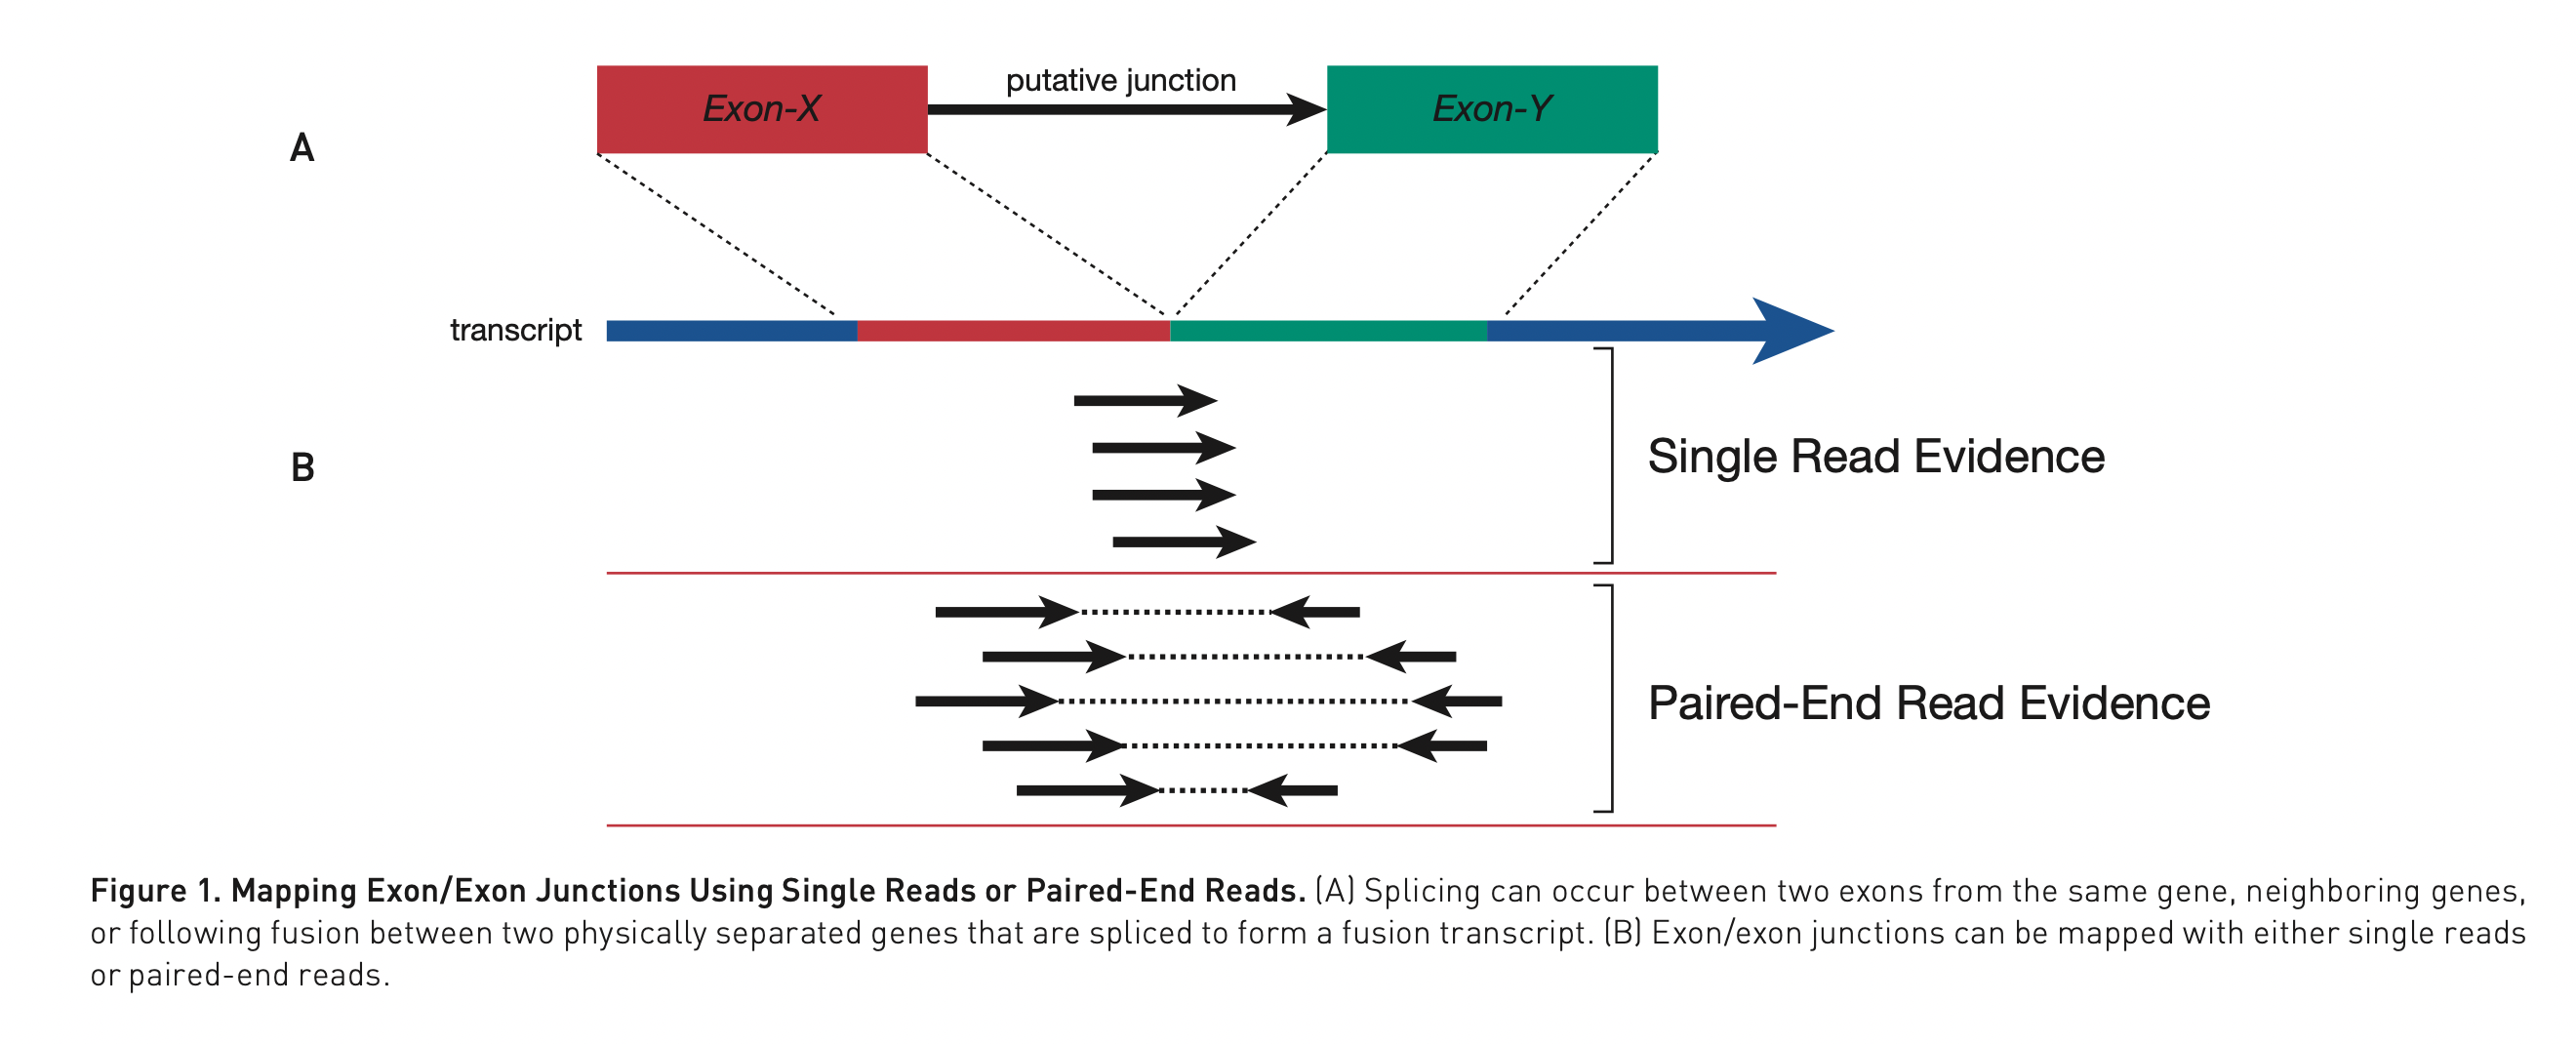

Retrived from: https://tools.thermofisher.com/content/sfs/brochures/cms_089464.pdf.

In [90]:
!conda install -c bioconda regtools -y

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - regtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    regtools-0.6.0             |       h9a82719_1         5.4 MB  bioconda

The following NEW packages will be INSTALLED:

    regtools:        0.6.0-h9a82719_1      bioconda

The following p

The 'junctions extract' command can be used to extract exon-exon junctions from an RNAseq BAM file. The output is a BED file. \
https://regtools.readthedocs.io/en/latest/commands/junctions-extract/

In [110]:
!samtools index rnaseq_1/data/B34_fragment.bam # нужно для запуска regtools..

In [120]:
!regtools junctions extract -s 0 ./rnaseq_1/data/B34_fragment.bam -o ./rnaseq_1/data/B34_fragment_exons_junct.bed
# 0 ридов


Program:	regtools
Version:	0.5.2
Minimum junction anchor length: 8
Minimum intron length: 70
Maximum intron length: 500000
Alignment: ./rnaseq_1/data/B34_fragment.bam
Output file: ./rnaseq_1/data/B34_fragment_exons_junct.bed



То есть, 2 рида, которые нашлись для выбранного файла в определенном сегменте, попали на экзоны, потому интроны не нашлись.
______
И второй способ (проверить это действо):

In [117]:
!samtools view rnaseq_1/data/B34_fragment.bam
# 101M = 101 matches (1 рид)
# 13S88M = 13 soft-clipping & 88 matches (2 рид)

# Soft-clipping можно считать как match (proof тут: https://www.biostars.org/p/86774/#87074) =>
# то есть, оба рида находятся в пределах экзона.

HISEQ:129:C2LRCACXX:1:2313:10059:26673	16	19	12487802	60	101M	*	0	0	AGAAGCTGGCTTCTAGCTAAGTGAGACCCCAGACAAAAAAACTAATAGAAGCTGAATTACTATTTATTTAAAATTTGTTTAAAAATCATGGTAAATCACCC	DDDDDDDDCDDDDEDDDEEEEDEC@FFHFHHJJJJJJIIIHJJJJJJJJJIIHIFDCIHIJJJJJJJJJJJJJJJJIJJJJJJJJJJJHGHHHFFFFDCCB	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:101	YT:Z:UU	NH:i:1
HISEQ:129:C2LRCACXX:1:1306:19916:40858	16	19	12488903	60	13S88M	*	0	0	GCTCTTCCGATCTCCCAACAAGCAGCTGAAAGAGTCAGATGCAGATGTTTGCACCCAACCATTGACAGAAGCTGCTGGATTAGGGGAAAACTGAAAGAAGC	@DDDDDDDDDDDDDDEEEFFFFFHHHHHHJJJJJJJJJJJJJJJJJJJJJIGHJJJHHJIJJJJJJJJJJJIJJJJJJJJJJJJJJJJHHHHHFFFFFCCC	AS:i:-19	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:34C53	YT:Z:UU	NH:i:1
